In [1]:
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [2]:
path = Path('./data/raw')

In [3]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

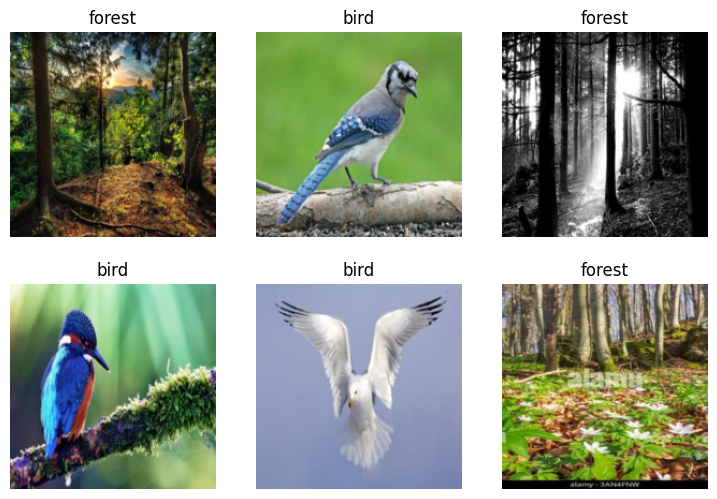

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.797045,0.177904,0.071429,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.085383,0.016152,0.014286,00:01
1,0.052252,0.003797,0.000000,00:01
2,0.038272,0.004969,0.000000,00:01
3,0.031149,0.003582,0.000000,00:01


In [10]:
print(torch.cuda.is_available())

True
